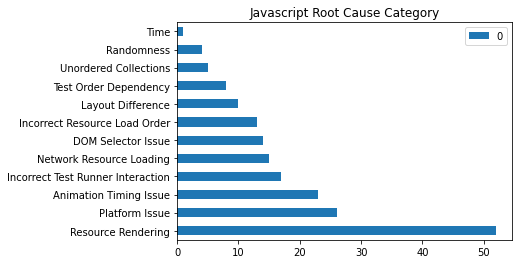

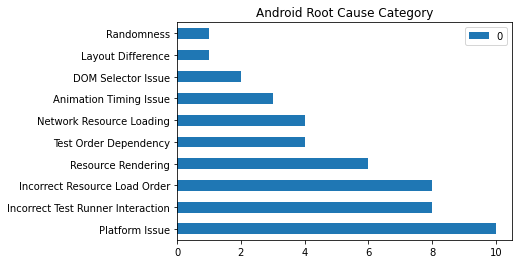

/home/rafael/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rafael/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


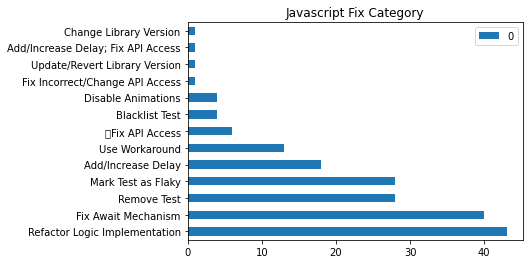

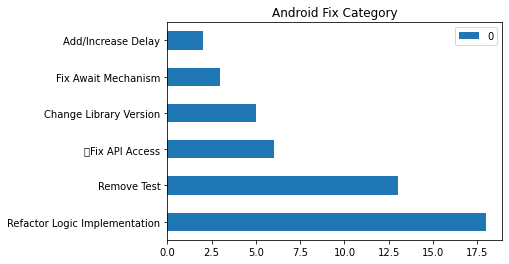

/home/rafael/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rafael/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rafael/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/rafael/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


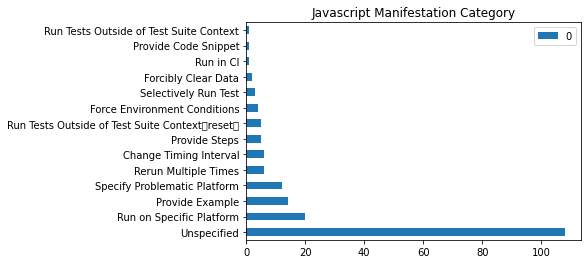

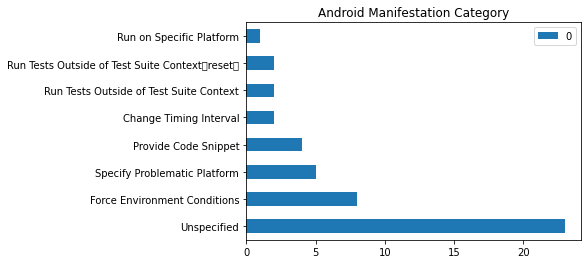

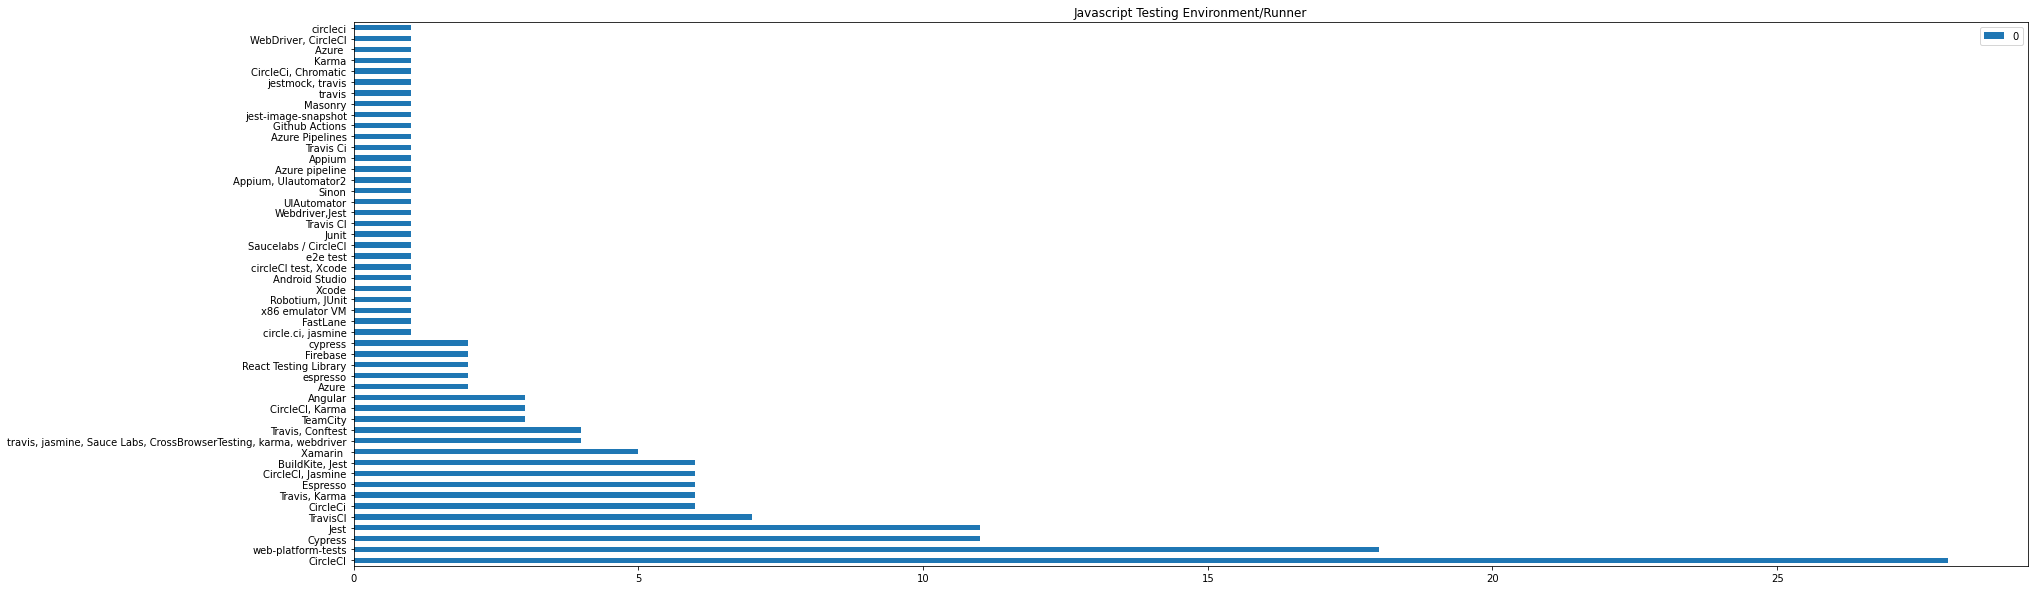

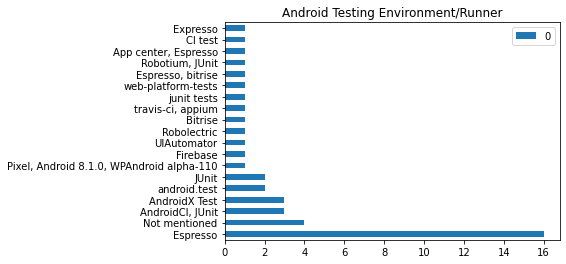

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import pie, axis, show

df = pd.read_csv('data/dataset.csv', sep=',')
df.drop(df[(df['Title'].str.lower().str.contains('android', case=False, na=False)) 
    | (df['URL'].str.lower().str.contains('android', case=False, na=False)) 
    | (df['Tests/Code Affected (to Reproduce)'].str.lower().str.contains('android', case=False, na=False))].index, 
    inplace=True)

javascript_dataset = df
df = None
df = pd.read_csv('data/dataset.csv', sep=',')
df.drop(df[~(df['Title'].str.lower().str.contains('android', case=False, na=False)) 
    & ~(df['URL'].str.lower().str.contains('android', case=False, na=False)) 
    & ~(df['Tests/Code Affected (to Reproduce)'].str.lower().str.contains('android', case=False, na=False))].index, 
    inplace=True)

android_dataset = df
df = None
df = pd.read_csv('data/dataset.csv', sep=',')

def compare_columns_languages(javascript_dataset, android_dataset, column):

    javascript_columns = javascript_dataset.columns
    android_columns = android_dataset.columns

    js_count = javascript_dataset[column].value_counts().values
    js_categories = javascript_dataset[column].value_counts().index

    android_count = android_dataset[column].value_counts().values
    android_categories = android_dataset[column].value_counts().index
    
    if(column == 'Testing Environment/Runner'):
        df = pd.DataFrame(js_count, index=js_categories)
        ax = df.plot.barh(figsize=(30, 10), title='Javascript {}'.format(column))   
    else:
        df = pd.DataFrame(js_count, index=js_categories)
        ax = df.plot.barh(title='Javascript {}'.format(column))

    df = pd.DataFrame(android_count, index=android_categories)
    ax = df.plot.barh(title='Android {}'.format(column))

compare_columns_languages(javascript_dataset, android_dataset, 'Root Cause Category')
compare_columns_languages(javascript_dataset, android_dataset, 'Fix Category')
compare_columns_languages(javascript_dataset, android_dataset, 'Manifestation Category')
compare_columns_languages(javascript_dataset, android_dataset, 'Testing Environment/Runner')